In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
low_memory=False

df = pd.read_csv("D:\Downloads\Asteroid.csv",sep=",", low_memory=False)  #завантажит дані
df.head() #вивести на екран назви колонок 

,full_name,a,e,G,i,om,w,q,ad,per_y,...,rot_per,GM,BV,UB,IR,spec_B,spec_T,neo,pha,moid
0,1 Ceres,2.769165,0.076009,0.12,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,...,9.074170,62.6284,0.713,0.426,NaN,C,G,N,N,1.59478
1,2 Pallas,2.772466,0.230337,0.11,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,...,7.813200,14.3000,0.635,0.284,NaN,B,B,N,N,1.23324
2,3 Juno,2.669150,0.256942,0.32,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,...,7.210000,NaN,0.824,0.433,NaN,Sk,S,N,N,1.03454
3,4 Vesta,2.361418,0.088721,0.32,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,...,5.342128,17.8000,0.782,0.492,NaN,V,V,N,N,1.13948
4,5 Astraea,2.574249,0.191095,NaN,5.366988,141.576604,358.687608,2.082324,3.066174,4.130323,...,16.806000,NaN,0.826,0.411,NaN,S,S,N,N,1.09589


In [113]:
df.shape #розмір датасета

(839736, 27)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839736 entries, 0 to 839735
Data columns (total 27 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   full_name       839736 non-null  object 
 1   a               839734 non-null  float64
 2   e               839736 non-null  float64
 3   G               119 non-null     float64
 4   i               839736 non-null  float64
 5   om              839736 non-null  float64
 6   w               839736 non-null  float64
 7   q               839736 non-null  float64
 8   ad              839730 non-null  float64
 9   per_y           839735 non-null  float64
 10  data_arc        823947 non-null  float64
 11  condition_code  838743 non-null  object 
 12  n_obs_used      839736 non-null  int64  
 13  H               837042 non-null  float64
 14  diameter        137681 non-null  object 
 15  extent          18 non-null      object 
 16  albedo          136452 non-null  float64
 17  rot_per   

In [3]:
df.isnull().sum()

full_name              0
a                      2
e                      0
G                 839617
i                      0
om                     0
w                      0
q                      0
ad                     6
per_y                  1
data_arc           15789
condition_code       993
n_obs_used             0
H                   2694
diameter          702055
extent            839718
albedo            703284
rot_per           820940
GM                839722
BV                838715
UB                838757
IR                839735
spec_B            838070
spec_T            838756
neo                    6
pha                16922
moid               16922
dtype: int64

In [12]:
#видалити пропуски
df.drop(['q','a', 'ad', 'G', 'full_name', 'per_y', 'data_arc', 'condition_code', 'H', 'extent', 'albedo', 'rot_per', 'GM', 'BV', 'UB', 'IR', 'spec_T', 'diameter', 'neo', 'pha', 'moid'], axis = 1)
#db = db.dropna(subset=['spec_B'])
df = df.dropna(subset=['diameter'])
df

KeyError: ['diameter']

In [14]:
for col in df.columns:
    try: 
        df[col].fillna(df[col].mean(), inplace=True)
    except:
        df[col].fillna(df[col].mode(), inplace=True)

In [15]:
df.dtypes
specs = dict([(n,i) for i,n in enumerate(df['spec_B'].unique())])

In [4]:
#db['full_name'] = db['full_name'].astype(str) # str(object)
#db = db.astype({"full_name":str})
#db = db.astype({"spec_B": })
#db['spec_B'] = pd.get_dummies(db['spec_B'])
db['Embarked'].fillna('S', inplace=True)

db['spec_B'] = db['spec_B'].map(lambda x: specs[x])

NameError: name 'titanic_data' is not defined

In [17]:
df['spec_B']

0           C
1           B
2          Sk
3           V
4           S
         ... 
797896    NaN
798113    NaN
798225    NaN
799788    NaN
810411    NaN
Name: spec_B, Length: 137681, dtype: object

In [255]:
db['spec_B'].value_counts()

4     445
0     152
6     139
7     138
11    114
13     67
1      66
8      56
3      48
9      48
5      41
14     38
16     37
10     36
15     30
2      29
23     27
24     20
17     19
20     17
27     16
19     15
12     15
21     13
18     10
25      7
30      6
22      5
26      4
32      3
29      2
28      1
31      1
33      1
Name: spec_B, dtype: int64

In [258]:
for i in range(0, (len(db)-1)):
    if 'spec_B' == (25 OR 30 OR 22 OR 26 OR 32 OR 29 OR 28 OR 31 OR 33):
        db = db.drop[i]
db['spec_B'].value_counts()

SyntaxError: invalid syntax (Temp/ipykernel_10140/626927410.py, line 2)

In [229]:
db['spec_B'].describe()

count    1666.000000
mean        7.755702
std         6.435896
min         0.000000
25%         4.000000
50%         6.000000
75%        11.000000
max        33.000000
Name: spec_B, dtype: float64

In [230]:
corr = db.corr()
corr

,e,i,om,w,n_obs_used,spec_B
e,1.000000,0.343134,0.045164,-0.025499,-0.540313,0.240990
i,0.343134,1.000000,-0.007896,-0.006042,-0.271840,0.124800
om,0.045164,-0.007896,1.000000,-0.070073,-0.060024,0.001735
w,-0.025499,-0.006042,-0.070073,1.000000,0.107154,0.002042
n_obs_used,-0.540313,-0.271840,-0.060024,0.107154,1.000000,-0.233750
spec_B,0.240990,0.124800,0.001735,0.002042,-0.233750,1.000000


<AxesSubplot:>

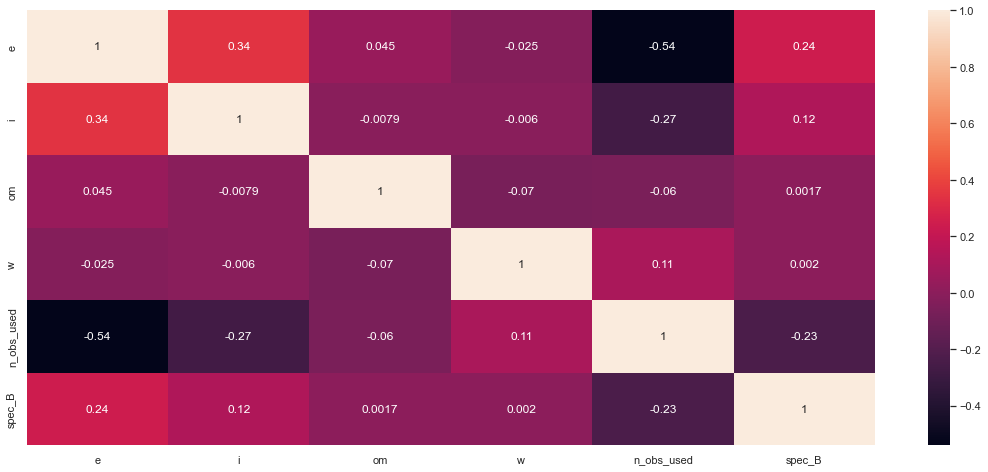

In [231]:
plt.figure(figsize = (19,8))
sns.heatmap(corr, annot=True)

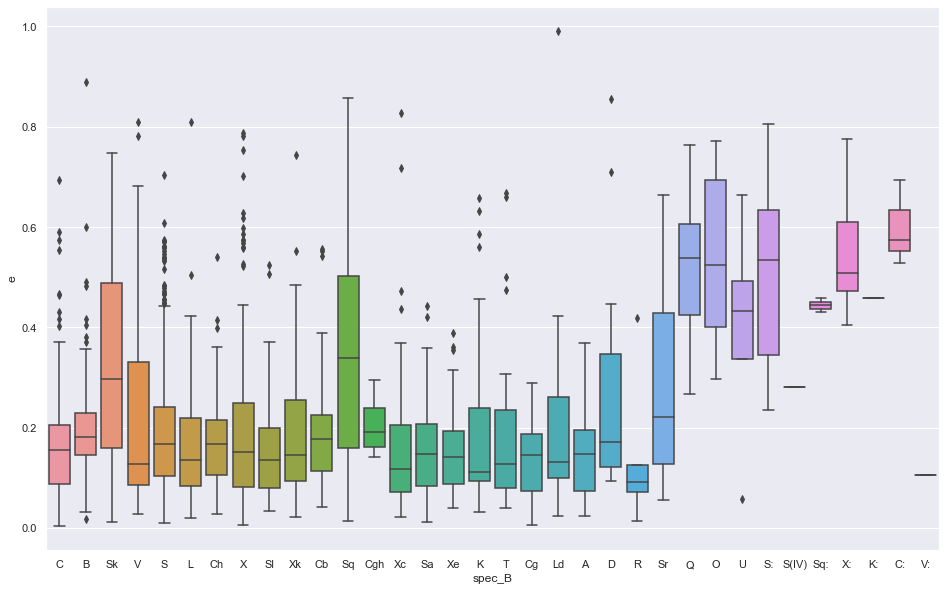

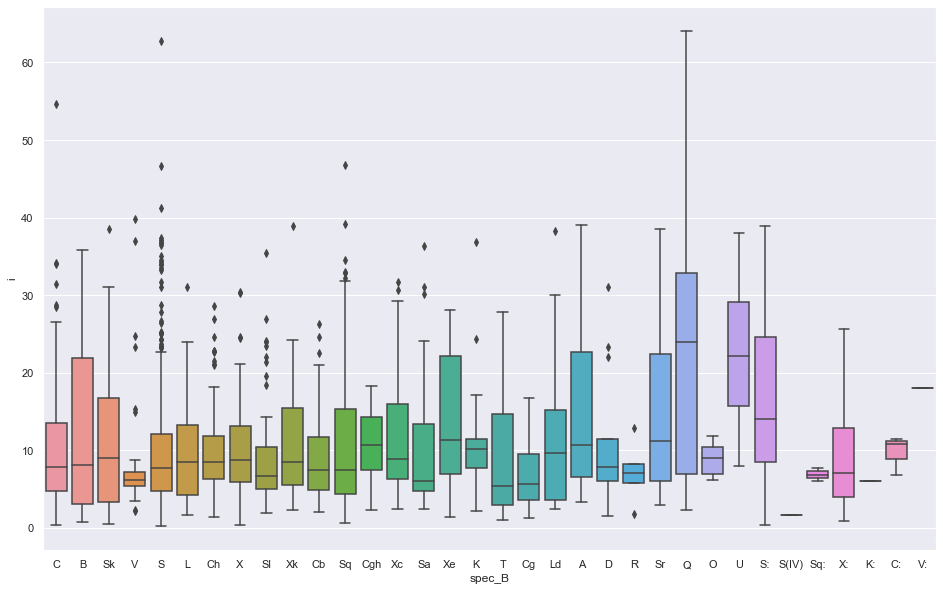

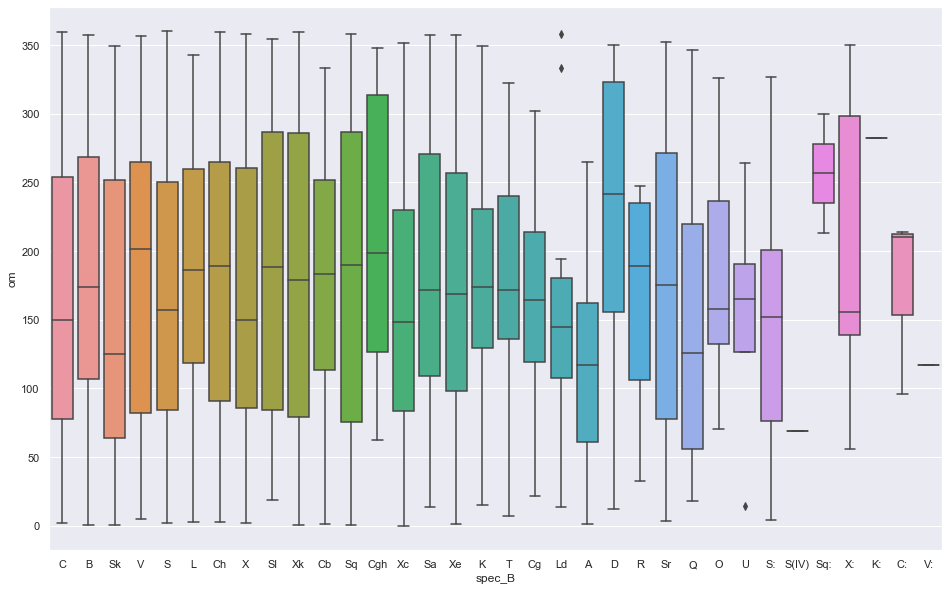

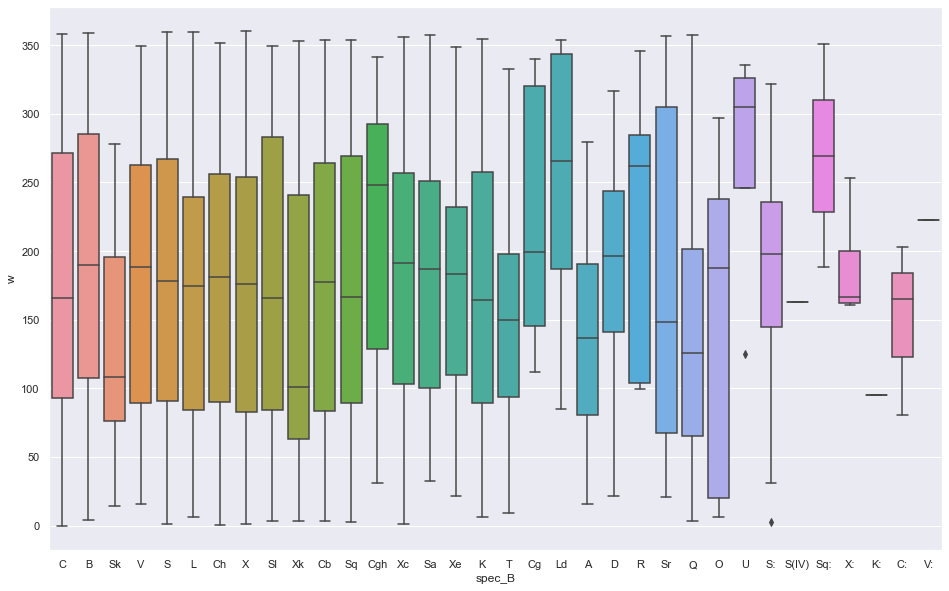

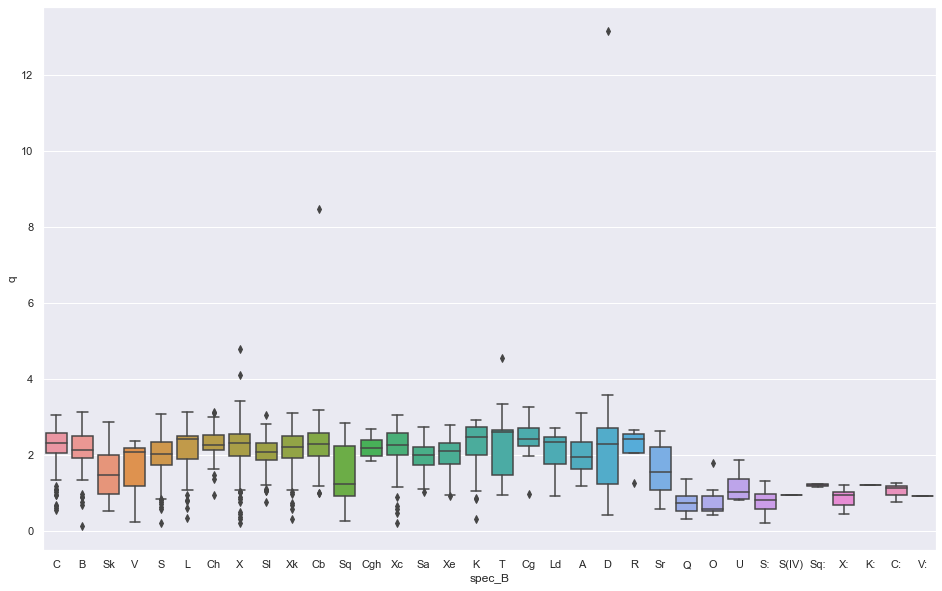

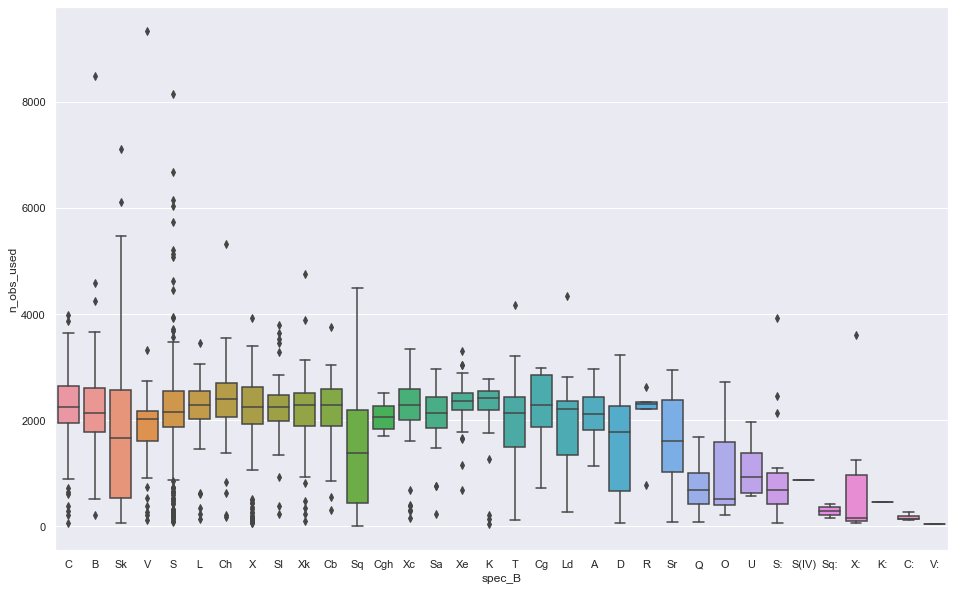

In [110]:
col = ["e","i","om","w","q","n_obs_used"]    # распределение по 5 значениям: медиана - пол черн
sns.set(rc={'figure.figsize':(16,10)})     # q1 - перв квантиль, нуже медианы, ку 3, и усики - мин и максимум
for item in col:
    sns.boxplot(x="spec_B", y=item, data=db)
    plt.show()

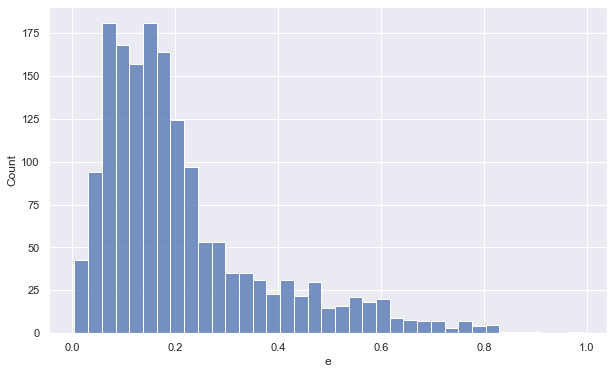

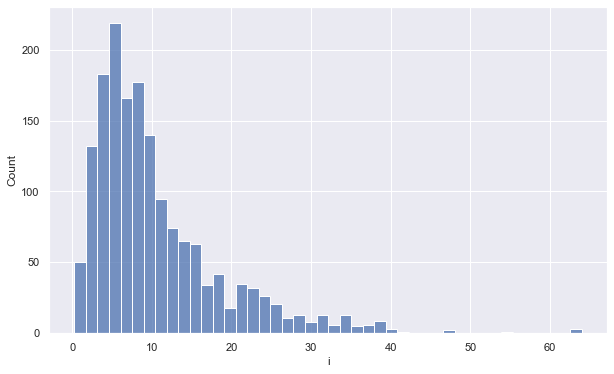

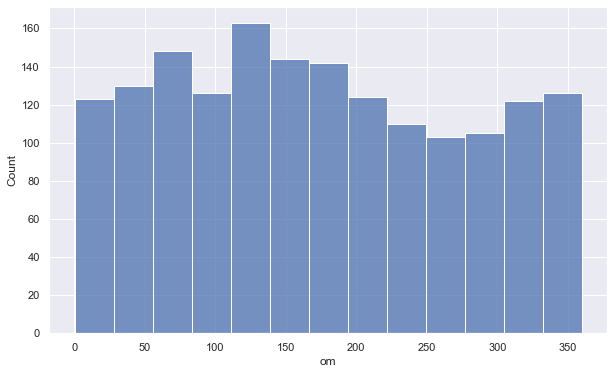

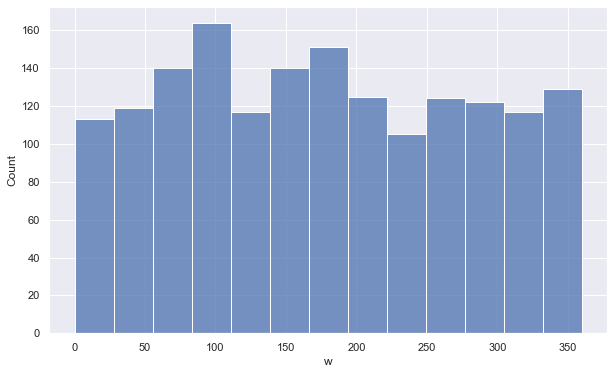

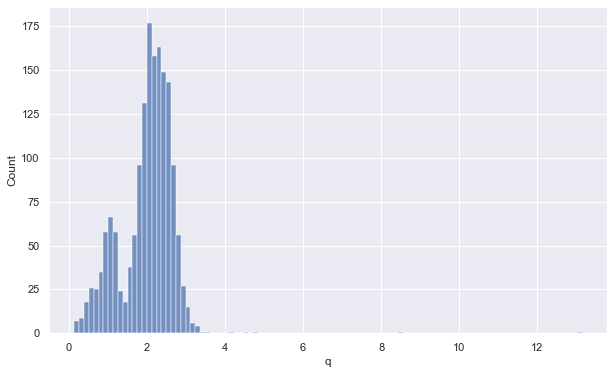

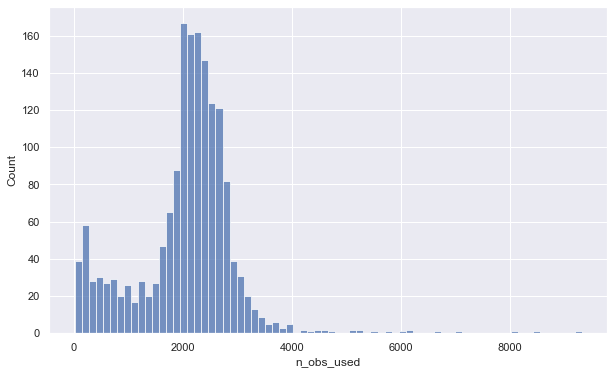

In [111]:
i = 1
for item in col:
    plt.figure(i, figsize=(10,6))   #оценка вероятности распределения переменных
    sns.histplot(db[item])
    i = i+1

In [232]:
#train
X = db.drop(['spec_B'], axis = 1)
y = db['spec_B']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train) 
scaled_X_test = scaler.transform(X_test)

Text(0, 0.5, 'Error Rate')

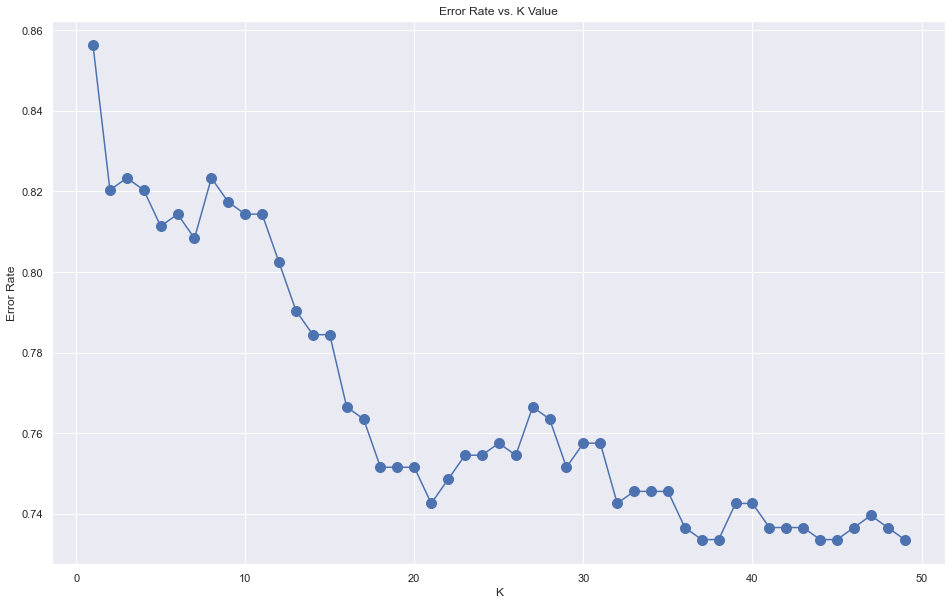

In [233]:
error_rate = []

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_X_train,y_train)
    pred_i = knn.predict(scaled_X_test)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(16,10))
plt.plot(range(1,50), error_rate, marker='o', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [220]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(scaled_X_train,y_train)
pred = knn.predict(scaled_X_test)

In [221]:
warnings.filterwarnings('ignore')
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.17      0.24      0.20        34
           1       0.15      0.17      0.16        12
           2       0.00      0.00      0.00         9
           3       0.43      0.27      0.33        11
           4       0.35      0.70      0.47        86
           5       0.00      0.00      0.00         9
           6       0.19      0.16      0.17        25
           7       0.36      0.19      0.24        27
           8       0.00      0.00      0.00        15
           9       0.00      0.00      0.00        11
          10       0.00      0.00      0.00         6
          11       0.13      0.18      0.15        17
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00        15
          14       0.00      0.00      0.00        10
          15       0.00      0.00      0.00         9
          16       0.33      0.17      0.22         6
          17       0.00    

The best score is 0.2470107853904424
The best parameters are:
 KNeighborsClassifier(n_neighbors=23)
